In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import glob

In [2]:
real_trading = pd.read_csv("../csvfiles/seoul_estate.csv",encoding="euc-kr")
real_trading.info()
def make_new_trading(gu):
    new_trading = real_trading[real_trading["자치구명"]==gu]
    new_trading.reset_index(drop=True,inplace=True)
    new_trading.head(5)
    new_trading_apart = new_trading[new_trading["건물용도"]=="아파트"]
    new_trading_apart.reset_index(drop=True,inplace=True)
    


    # 건물면적을 범주화하여 새로운 열 생성
    new_trading_apart['건물크기'] = np.select(
        [
            (new_trading_apart['건물면적(㎡)'] > 0) & (new_trading_apart['건물면적(㎡)'] <= 30.0),
            (new_trading_apart['건물면적(㎡)'] > 30.0) & (new_trading_apart['건물면적(㎡)'] <= 50.0),
            (new_trading_apart['건물면적(㎡)'] > 50.0) & (new_trading_apart['건물면적(㎡)'] <= 70.0),
            (new_trading_apart['건물면적(㎡)'] > 70.0) & (new_trading_apart['건물면적(㎡)'] <= 100.0),
            (new_trading_apart['건물면적(㎡)'] > 100.0)
        ],
        [
            '초소형',
            '소형',
            '중형',
            '대형',
            '대형이상'
        ],
        default='Unknown'
    )

    # 결과 확인
    return new_trading_apart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138687 entries, 0 to 138686
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              138687 non-null  int64  
 1   자치구명              138687 non-null  object 
 2   법정동명              138687 non-null  object 
 3   건물명               128402 non-null  object 
 4   계약일               138687 non-null  int64  
 5   물건금액(만원)          138687 non-null  int64  
 6   건물면적(㎡)           138687 non-null  float64
 7   토지면적(㎡)           137988 non-null  float64
 8   층                 128419 non-null  float64
 9   취소일               6255 non-null    float64
 10  건축년도              137425 non-null  float64
 11  건물용도              138687 non-null  object 
 12  신고구분              11952 non-null   object 
 13  신고한 개업공인중개사 시군구명  8602 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 14.8+ MB


/tmp/ipykernel_11491/98223162.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  real_trading = pd.read_csv("../csvfiles/seoul_estate.csv",encoding="euc-kr")


In [4]:
nowon_trading = real_trading[real_trading["자치구명"]=="노원구"]
nowon_trading.reset_index(drop=True,inplace=True)
nowon_trading.head(5)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2021,11350,노원구,10500,상계동,1.0,대지,136.0,72.0,디자인빌상계,...,26500,26.46,17.19,2.0,NaN,NaN,2021.0,연립다세대,중개거래,대구 서구
1,2021,11350,노원구,10500,상계동,1.0,대지,149.0,2.0,현대베스트빌,...,22000,60.90,32.49,4.0,NaN,NaN,2008.0,연립다세대,중개거래,서울 마포구
2,2021,11350,노원구,10300,공릉동,NaN,NaN,NaN,NaN,NaN,...,196000,211.28,258.60,NaN,NaN,NaN,1983.0,단독다가구,중개거래,"서울 강동구, 서울 강서구, 서울 성동구"
3,2021,11350,노원구,10500,상계동,1.0,대지,148.0,4.0,"보람하이츠빌라가,나",...,37000,43.56,22.81,1.0,NaN,NaN,1993.0,연립다세대,중개거래,서울 노원구
4,2021,11350,노원구,10500,상계동,1.0,대지,146.0,2.0,천우빌라나동,...,12000,30.30,15.36,4.0,NaN,NaN,1996.0,연립다세대,직거래,NaN


In [5]:
nowon_trading_apart = nowon_trading[nowon_trading["건물용도"]=="아파트"]
nowon_trading_apart.reset_index(drop=True,inplace=True)

In [6]:
test = nowon_trading_apart.copy()

In [7]:
import numpy as np


# 건물면적을 범주화하여 새로운 열 생성
test['건물크기'] = np.select(
    [
        (test['건물면적(㎡)'] > 0) & (test['건물면적(㎡)'] <= 30.0),
        (test['건물면적(㎡)'] > 30.0) & (test['건물면적(㎡)'] <= 50.0),
        (test['건물면적(㎡)'] > 50.0) & (test['건물면적(㎡)'] <= 70.0),
        (test['건물면적(㎡)'] > 70.0) & (test['건물면적(㎡)'] <= 100.0),
        (test['건물면적(㎡)'] > 100.0)
    ],
    [
        '초소형',
        '소형',
        '중형',
        '대형',
        '대형이상'
    ],
    default='Unknown'
)

# 결과 확인
print(test[test['건물크기']=="초소형"])

      접수연도  자치구코드 자치구명  법정동코드 법정동명  지번구분 지번구분명     본번    부번     건물명  ...  \
12    2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
39    2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
45    2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
66    2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
153   2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
154   2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
166   2021  11350  노원구  10300  공릉동   1.0    대지  670.0   6.0     미라쉘  ...   
205   2021  11350  노원구  10400  하계동   1.0    대지  284.0   0.0     한신1  ...   
274   2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
309   2021  11350  노원구  10300  공릉동   1.0    대지  683.0  14.0  한일휴니스빌  ...   
311   2021  11350  노원구  10400  하계동   1.0    대지  284.0   0.0     한신1  ...   
356   2021  11350  노원구  10400  하계동   1.0    대지  284.0   0.0     한신1  ...   
405   2021  

In [8]:
test["건물크기"].value_counts()

건물크기
소형      1597
중형      1398
대형      1048
대형이상     218
초소형       56
Name: count, dtype: int64

In [25]:
def draw_graph(dataframe):

    plt.figure(figsize=(10,10))
    plt.plot(dataframe["건물크기"].value_counts())
    plt.bar(dataframe["건물크기"].value_counts().index, dataframe["건물크기"].value_counts(), color='skyblue')
    plt.title('아파트 사이즈 별 매매 갯수')
    plt.xlabel('아파트 사이즈 구분')
    plt.ylabel('아파트 갯수')
    plt.show()

In [26]:
jongrogu = make_new_trading("종로구")

In [32]:
nowon_trading = make_new_trading("노원구")

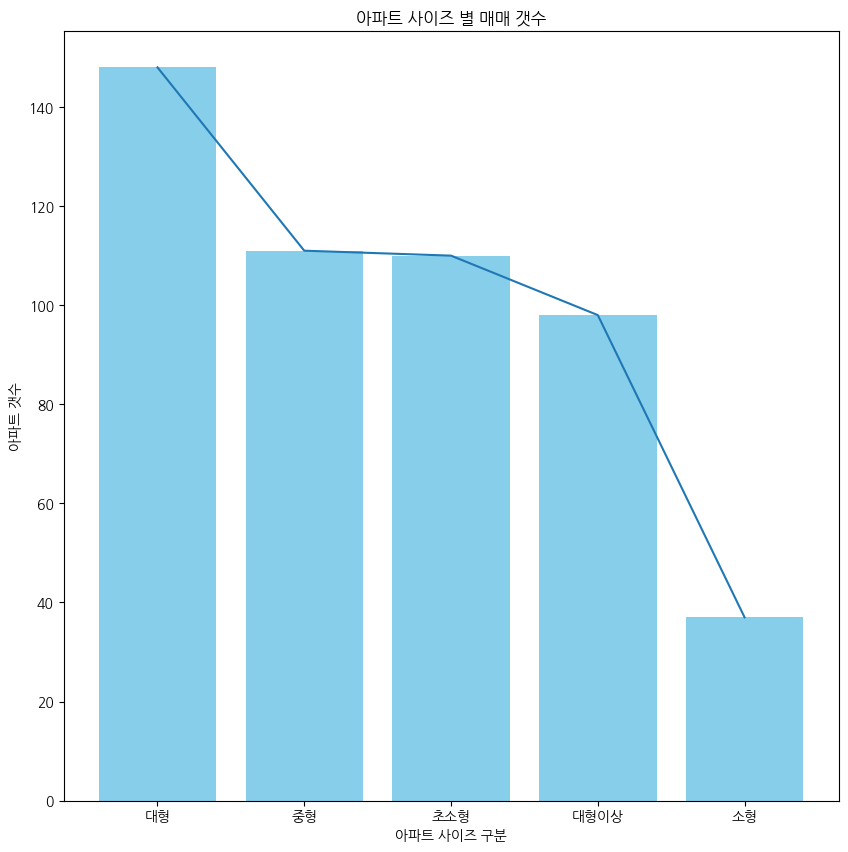

In [27]:
draw_graph(jongrogu)

In [37]:
nowon_apart_price = nowon_trading.pivot_table(index="건물크기",values="물건금액(만원)",aggfunc="mean")

In [38]:
jongro_apart_price = jongrogu.pivot_table(index="건물크기",values="물건금액(만원)",aggfunc="mean")

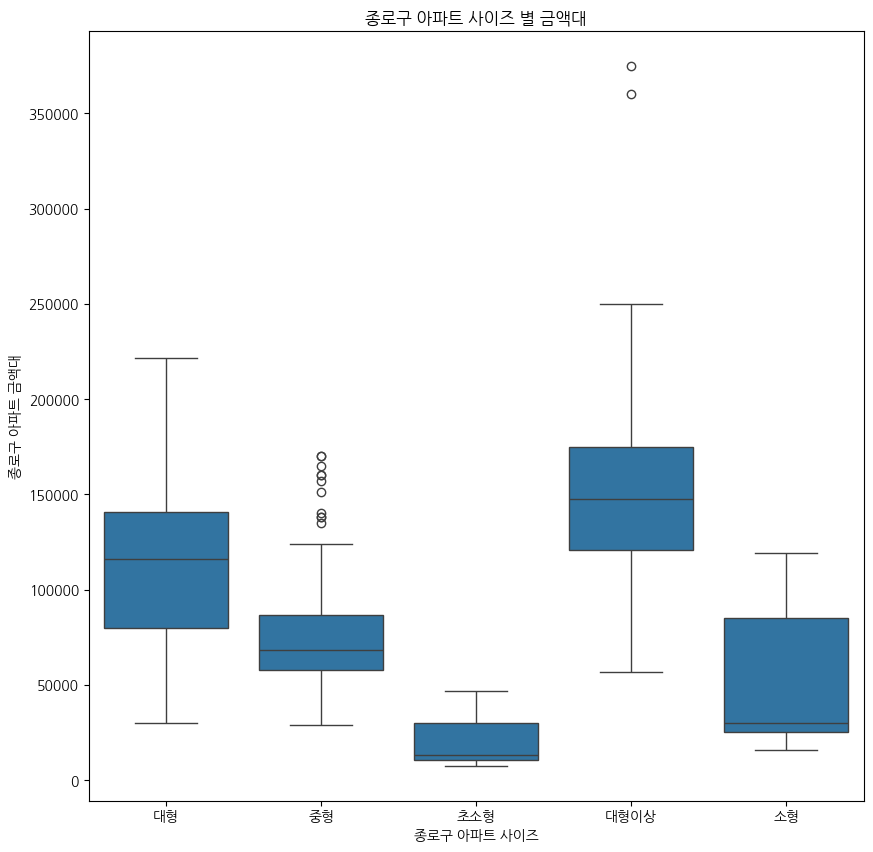

In [58]:
plt.figure(figsize=(10,10))
plt.title("종로구 아파트 사이즈 별 금액대")
sns.boxplot(x=jongrogu["건물크기"],y=jongrogu["물건금액(만원)"])
plt.xlabel("종로구 아파트 사이즈")
plt.ylabel("종로구 아파트 금액대")
plt.show()

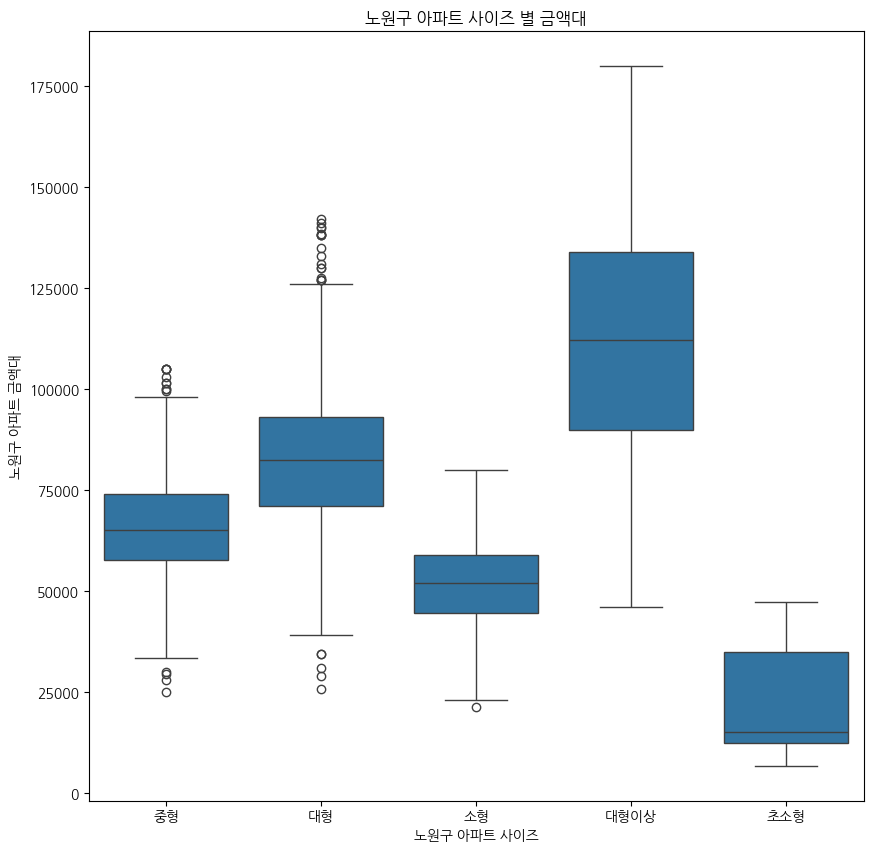

In [59]:
plt.figure(figsize=(10,10))
plt.title("노원구 아파트 사이즈 별 금액대")
sns.boxplot(x=nowon_trading["건물크기"],y=nowon_trading["물건금액(만원)"])
plt.xlabel("노원구 아파트 사이즈")
plt.ylabel("노원구 아파트 금액대")
plt.show()

In [ ]:
real_trading.to_csv('03_seoul_estate.csv', encoding='utf-8', index=False)